In [1]:
import pandas as pd
import os
from glob import glob

In [2]:
path_to_dataset = '/nfs/gns/literature/Santosh_Tirunagari/OTAR_scoring/'

names_ = ['gene', 'disease', 'epmc_extra_pubmeds', 'section_sentence']

In [3]:
data = glob(path_to_dataset+'*.tsv')
both_rc_terms = glob(path_to_dataset+'*.csv')

In [4]:
data

['/nfs/gns/literature/Santosh_Tirunagari/OTAR_scoring/common_sent_500_articles.tsv',
 '/nfs/gns/literature/Santosh_Tirunagari/OTAR_scoring/rare_sent_500_articles.tsv']

In [5]:
df_common = pd.read_csv(data[0], sep = '\t', names = names_)
df_rare = pd.read_csv(data[1], sep = '\t', names = names_)

In [6]:
rc_set = set()

with open(both_rc_terms[0],'r') as f:
    temp_ = f.read()
    for each_line in temp_.split('\n'):
        rc_set.add(each_line.split("'},{'")[-1].replace("'}",''))


In [7]:
list(rc_set)

['cataract',
 'osteoarthritis',
 'non-Hodgkins lymphoma',
 'rhabdomyolysis',
 '',
 'susceptibility to pneumonia measurement',
 'congenital heart disease',
 'carcinoid tumor',
 'peripheral neuropathy',
 'unipolar depression',
 'open-angle glaucoma',
 'rectal bleeding',
 'ulcerative colitis',
 'Meningioma',
 'pulmonary arterial hypertension',
 'aggressive periodontitis',
 'emphysema',
 'nephrotic syndrome',
 'papillary thyroid carcinoma',
 'Chondrocalcinosis',
 'Myopia',
 'basal cell carcinoma',
 'autism spectrum disorder',
 'autoimmune disease',
 'seborrheic keratosis',
 'Huntington disease',
 'Headache',
 'aspirin induced asthma',
 'head and neck squamous cell carcinoma',
 'nasopharyngeal neoplasm',
 'pancreatic neoplasm',
 'Isolated scaphocephaly',
 'kidney stone',
 'acute lymphoblastic leukemia',
 'memory impairment',
 'idiopathic pulmonary fibrosis',
 'amyotrophic lateral sclerosis',
 'cardiomyopathy',
 'psoriatic arthritis',
 "Barrett's esophagus",
 'Pituitary Gland Adenoma',
 'fai

In [8]:
df_common.head(10)

,gene,disease,epmc_extra_pubmeds,section_sentence
0,"mucin 1, cell surface associated",gastric carcinoma,http://europepmc.org/abstract/MED/26701879,"\nintroduction_and_background-----Recently, s..."
1,chondroadherin like,osteoarthritis,http://europepmc.org/abstract/MED/28319091,\ntitle-----Whole-genome sequencing identifie...
2,BRCA2 DNA repair associated,lung carcinoma,http://europepmc.org/abstract/MED/24880342,\ntitle-----Rare variants of large effect in ...
3,fucosyltransferase 2,gallstones,http://europepmc.org/abstract/MED/30504769,\nresults-----Three novel gallstone-associate...
4,EMAP like 4,infantile hypertrophic pyloric stenosis,http://europepmc.org/abstract/MED/30281099,\ntitle-----Genome-wide meta-analysis identif...
5,insulin like growth factor 2,type II diabetes mellitus,http://europepmc.org/abstract/MED/28838971,\ntitle-----A Loss-of-Function Splice Accepto...
6,BRCA2 DNA repair associated,ovarian carcinoma,http://europepmc.org/abstract/MED/27197191,\nabstract-----We also identified a known bre...
7,BRCA2 DNA repair associated,prostate carcinoma,http://europepmc.org/abstract/MED/27197191,\nabstract-----We also identified a known bre...
8,membrane associated ring-CH-type finger 8,gallstones,http://europepmc.org/abstract/MED/30504769,\nresults-----Three novel gallstone-associate...
9,solute carrier family 45 member 2,melanoma,http://europepmc.org/abstract/MED/28212542,\ndiscussion-----Of the nine genome-wide sign...


In [9]:
both_common_rare = []
common_sentences = []
for index, row in df_common.iterrows():
    
    if row['disease'] in rc_set:
        label = 'common_rare'
    else:
        label = 'common'
    
    temp = row['section_sentence'].split('\n')
    
    for each_sentence in temp:
        if len(each_sentence)>10:
            temp_ = each_sentence.split('-----')
            if label == 'common_rare':
                both_common_rare.append([temp_[0],temp_[1],label])
            else:
                common_sentences.append([temp_[0],temp_[1],label])                    

In [10]:
len(common_sentences)

433

In [11]:
rare_sentences = []
for index, row in df_rare.iterrows():
    
    if row['disease'] in rc_set:
        label = 'common_rare'
    else:
        label = 'rare'
    
    temp = row['section_sentence'].split('\n')
    
    for each_sentence in temp:
        if len(each_sentence)>10:
            temp_ = each_sentence.split('-----')
            if label == 'common_rare':
                both_common_rare.append([temp_[0],temp_[1],label])
            else:
                rare_sentences.append([temp_[0],temp_[1],label])                    

In [12]:
len(rare_sentences), len(both_common_rare)

(993, 1238)

In [13]:
common_sentences_df = pd.DataFrame(common_sentences, columns=["section", "sentence", "label"])
rare_sentences_df = pd.DataFrame(rare_sentences, columns=["section", "sentence", "label"])
common_rare_sentences_df = pd.DataFrame(both_common_rare, columns=["section", "sentence", "label"])

In [14]:
dataset = common_sentences_df.append(rare_sentences_df)
dataset.head(10)

,section,sentence,label
0,title,Genome-wide meta-analysis identifies BARX1 and...,common
1,abstract,Two coding variants in TPCN2 are associated wi...,common
2,results,The hyperuricemia-associated SNVs (rs505802 of...,common
3,results,"For instance, the SNV rs121907892 of SLC22A12 ...",common
4,abstract,Replications of associations (in the genes OCA...,common
5,other,Sulem et al. [4] found associations for hair c...,common
6,title,Interaction between ERAP1 and HLA-B27 in ankyl...,common
7,abstract,"We also show that polymorphisms of ERAP1, whic...",common
8,title,"Meta-analysis of 65,734 individuals identifies...",common
9,discussion,"With clinically defined gout cases, we previou...",common


# Fun part starts now

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import argmax, array
import pickle
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [16]:
# get the section data
values = array(dataset.section.tolist())

section_encoder = LabelEncoder()
integer_encoded = section_encoder.fit_transform(values)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

list(section_encoder.classes_)

/homes/stirunag/anaconda3/envs/scispacy/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


['abstract',
 'conclusion_and_future_work',
 'discussion',
 'figure',
 'introduction_and_background',
 'other',
 'results',
 'table',
 'title']

In [17]:
section_info_df = pd.DataFrame(onehot_encoded, columns=section_encoder.classes_)
section_info_df

,abstract,conclusion_and_future_work,discussion,figure,introduction_and_background,other,results,table,title
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1422,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1423,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1424,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
import requests

url = 'http://ai-capo-api-lb/spaCy_ner_predictor?text_sentence='  # Load Balancer

def get_sentence_info_gp_ds(each_sentence):

    set_GP_tags = set()
    set_DS_tags = set()
#     sentence_length = len(each_sentence)

    r = requests.get(url + each_sentence)
    if r.status_code == 200 and r.json()['status'] == 200:
        for each_ml_annotation in r.json()['annotations']:
            if each_ml_annotation[2] == 'GP':
                set_GP_tags.add(each_ml_annotation[3])
            elif each_ml_annotation[2] == 'DS':
                set_DS_tags.add(each_ml_annotation[3])

    
    
    return [len(set_GP_tags), len(set_DS_tags)]


In [19]:
# get the gene, disease and total counts, sentence length

from tqdm import tqdm
sentence_info = []

for index, row in tqdm(dataset.iterrows(), total = len(dataset)):
    sentence_info.append(get_sentence_info_gp_ds(row['sentence']))
    
    
    


100%|██████████| 1426/1426 [00:28<00:00, 49.18it/s]


In [21]:
sentence_info_df = pd.DataFrame(sentence_info, columns=["GP_count", "DS_count"])
sentence_info_df

,GP_count,DS_count
0,0,1
1,2,0
2,3,0
3,1,1
4,9,0
...,...,...
1421,2,0
1422,0,0
1423,0,1
1424,1,1


In [22]:
df = pd.concat([section_info_df,sentence_info_df], axis=1)
df

,abstract,conclusion_and_future_work,discussion,figure,introduction_and_background,other,results,table,title,GP_count,DS_count
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0
...,...,...,...,...,...,...,...,...,...,...,...
1421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,0
1422,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1423,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1424,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [23]:
import pickle
import pathlib
BASE_DIR = path_to_dataset+'data_models'

pathlib.Path(BASE_DIR).mkdir(parents=True, exist_ok=True)


def load(filename):
    file = open(BASE_DIR+filename+'.bin','rb')
    data = pickle.load(file)
    file.close()
    return data

def dump(data,filename):
    file = open(BASE_DIR+filename+'.bin','wb')
    pickle.dump(data, file)
    file.close()

In [24]:
dump(onehot_encoder, 'onehot_encoder')
dump(section_encoder, 'section_encoder')

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(list(dataset.label.values))
# list(le.classes_)

X = df.values
y = le.transform(list(dataset.label.values))

# scaler = StandardScaler()
# scaler.fit(X)
# StandardScaler(copy=True, with_mean=True, with_std=True)
# X = scaler.transform(X)

# dump(scaler, 'scaler')
dump(le, 'lab_decode')

In [26]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.22, random_state=42, stratify=y)

In [27]:
# mlp = MLPClassifier(max_iter=100)


# parameter_space = {
#     'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
# }




# clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)



# # train classifier
# print('Training classifier ...')
# clf.fit(X_train, y_train)
# print('Training complete')

# dump(clf, 'model')



In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1,5,10], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear']}

grid = GridSearchCV(SVC(probability=True),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)



/homes/stirunag/anaconda3/envs/scispacy/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    2.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 5, 10], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [31]:
from sklearn import metrics

print(grid.best_estimator_)

grid_predictions = grid.predict(X_test)

print(metrics.classification_report(y_test,grid_predictions, target_names=np.unique(le.inverse_transform(y_test))))

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
              precision    recall  f1-score   support

      common       0.70      0.64      0.67        95
        rare       0.85      0.88      0.87       219

    accuracy                           0.81       314
   macro avg       0.78      0.76      0.77       314
weighted avg       0.81      0.81      0.81       314



In [33]:
clf = SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

clf.fit(X_train,y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [34]:
clf_predictions = clf.predict(X_test)

print(metrics.classification_report(y_test,clf_predictions, target_names=np.unique(le.inverse_transform(y_test))))

              precision    recall  f1-score   support

      common       0.70      0.64      0.67        95
        rare       0.85      0.88      0.87       219

    accuracy                           0.81       314
   macro avg       0.78      0.76      0.77       314
weighted avg       0.81      0.81      0.81       314



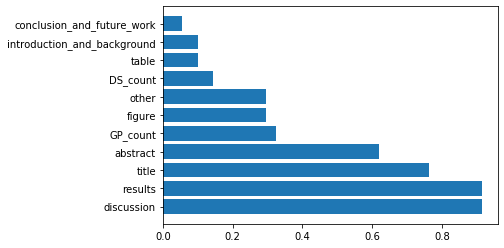

In [38]:
from matplotlib import pyplot as plt

%matplotlib inline 
#notebook

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

f_importances(abs(clf.coef_[0]), df.columns.tolist())

In [60]:
onehot_encoder.transform(section_encoder.transform([common_rare_sentences_df.iloc[10].section]).reshape(-1, 1)).tolist() 

[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]]

In [81]:
dataset_rc = []
for index, row in tqdm(common_rare_sentences_df.iterrows(), total = len(common_rare_sentences_df)):
    sections_ = onehot_encoder.transform(section_encoder.transform([row['section']]).reshape(-1, 1)) 
    sections_info_rc = sections_.tolist()[0]
    sentence_info_rc = get_sentence_info_gp_ds(row['sentence'])
    dataset_rc.append([sections_info_rc + sentence_info_rc][0])

100%|██████████| 1238/1238 [00:38<00:00, 31.85it/s]


In [82]:
dataset_rc

[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 13, 4],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 6, 1],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0, 1],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 1],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2, 1],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 1],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1, 3],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1, 1],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1, 1],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1, 1],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2, 1],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 11, 1],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 5, 0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 1],
 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3, 1],
 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2, 2],
 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 1],
 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6, 1],
 [0.0, 0.0, 0.0, 0.0, 0.0,

In [83]:
dataset_rc_df = pd.DataFrame(dataset_rc, columns=df.columns.tolist())
dataset_rc_df

,abstract,conclusion_and_future_work,discussion,figure,introduction_and_background,other,results,table,title,GP_count,DS_count
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13,4
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
1233,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0
1234,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1
1235,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1236,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [92]:
clf_rc_predictions = clf.predict_proba(dataset_rc_df.values)
xx = np.max(clf_rc_predictions, axis=1)

xx

array([0.99275153, 0.75265863, 0.95337454, ..., 0.90169305, 0.90169305,
       0.96327622])

In [97]:
xx = clf_rc_predictions.ravel()
xx

array([0.99275153, 0.00724847, 0.75265863, ..., 0.90169305, 0.03672378,
       0.96327622])

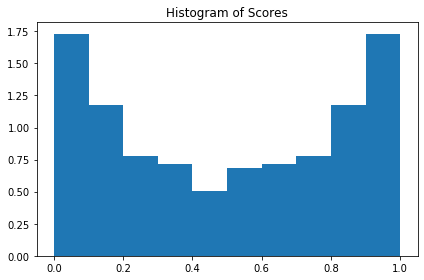

In [99]:
num_bins = 10

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(xx, num_bins, density=1)



ax.set_title(r'Histogram of Scores')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()